## Transfer Learning VGG 16 and VGG 19 using Keras

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'drive/My Drive/Data/Cars/Train'
valid_path = 'drive/My Drive/Data/Cars/Test'


In [4]:
# Import the  RESNET-50 library as shown below and add preprocessing layer to the front of RESNET50
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('drive/My Drive/Data/Cars/Train/*')

In [8]:
folders

['drive/My Drive/Data/Cars/Train/audi',
 'drive/My Drive/Data/Cars/Train/mercedes',
 'drive/My Drive/Data/Cars/Train/lamborghini']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('drive/My Drive/Data/Cars/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 75 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('drive/My Drive/Data/Cars/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
5/5 [==============================] - 28s 6s/step - loss: 8.4094 - accuracy: 0.2400 - val_loss: 7.4666 - val_accuracy: 0.1724
Epoch 2/50
5/5 [==============================] - 17s 3s/step - loss: 6.4064 - accuracy: 0.2667 - val_loss: 4.2225 - val_accuracy: 0.1552
Epoch 3/50
5/5 [==============================] - 16s 3s/step - loss: 3.9109 - accuracy: 0.3600 - val_loss: 1.5118 - val_accuracy: 0.3966
Epoch 4/50
5/5 [==============================] - 16s 3s/step - loss: 3.2053 - accuracy: 0.5467 - val_loss: 4.8237 - val_accuracy: 0.3793
Epoch 5/50
5/5 [==============================] - 17s 3s/step - loss: 2.0880 - accuracy: 0.5867 - val_loss: 2.6008 - val_accuracy: 0.3448
Epoch 6/50
5/5 [==============================] - 17s 3s/step - loss: 1.7663 - accuracy: 0.4800 - val_loss: 2.0048 - val_accuracy: 0.5517
Epoch 7/50
5/5 [==============================] - 18s 4s/step - loss: 1.1718 - accuracy: 0.6400 

In [20]:
r.history

{'accuracy': [0.23999999463558197,
  0.2666666805744171,
  0.36000001430511475,
  0.54666668176651,
  0.5866666436195374,
  0.47999998927116394,
  0.6399999856948853,
  0.6133333444595337,
  0.6000000238418579,
  0.7066666483879089,
  0.653333306312561,
  0.7066666483879089,
  0.800000011920929,
  0.7200000286102295,
  0.7066666483879089,
  0.7733333110809326,
  0.7200000286102295,
  0.800000011920929,
  0.8666666746139526,
  0.8666666746139526,
  0.8666666746139526,
  0.8799999952316284,
  0.8133333325386047,
  0.7333333492279053,
  0.6933333277702332,
  0.7599999904632568,
  0.8666666746139526,
  0.9200000166893005,
  0.9333333373069763,
  0.8933333158493042,
  0.9599999785423279,
  0.9333333373069763,
  0.9066666960716248,
  0.9066666960716248,
  0.9200000166893005,
  0.9066666960716248,
  0.9066666960716248,
  0.9200000166893005,
  0.8799999952316284,
  0.8399999737739563,
  0.9066666960716248,
  0.8799999952316284,
  0.8799999952316284,
  0.800000011920929,
  0.8666666746139526,
 

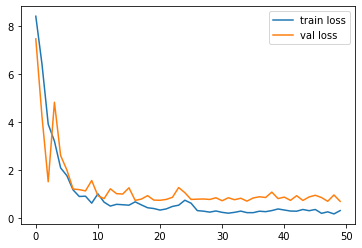

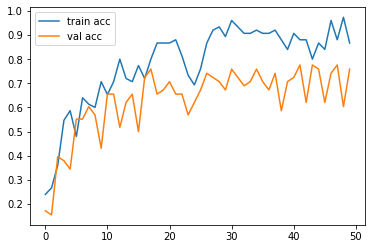

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [23]:

y_pred = model.predict(test_set)


In [24]:
y_pred

array([[2.96317101e-01, 1.91069189e-02, 6.84575975e-01],
       [3.07704099e-02, 8.13546002e-01, 1.55683503e-01],
       [5.34785628e-01, 2.44943842e-01, 2.20270559e-01],
       [9.69921231e-01, 1.34551749e-02, 1.66237280e-02],
       [9.95064557e-01, 1.52451533e-03, 3.41088907e-03],
       [2.34941526e-05, 9.73383663e-04, 9.99003112e-01],
       [2.84186304e-01, 3.40597451e-01, 3.75216275e-01],
       [5.95795503e-03, 7.50356074e-03, 9.86538529e-01],
       [8.26394418e-04, 9.98733222e-01, 4.40357981e-04],
       [4.08747852e-01, 2.15184927e-01, 3.76067191e-01],
       [2.02866718e-01, 2.37477407e-01, 5.59655845e-01],
       [4.17592149e-04, 9.89095032e-01, 1.04873227e-02],
       [1.26550801e-03, 9.97995615e-01, 7.38953531e-04],
       [2.80659762e-03, 1.00263325e-03, 9.96190786e-01],
       [1.39545240e-02, 8.75923395e-01, 1.10122010e-01],
       [7.72202790e-01, 1.55247718e-01, 7.25494847e-02],
       [3.99214774e-02, 4.06936696e-03, 9.56009090e-01],
       [2.68206699e-03, 9.97218

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_resnet50.h5')

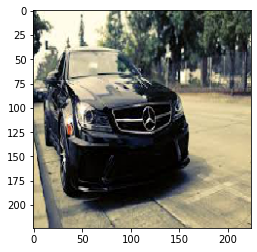

In [116]:
img=image.load_img('drive/My Drive/Data/Cars/Test/mercedes/39.jpg',target_size=(224,224))
#mercedes
plt.imshow(img)

In [117]:
x=image.img_to_array(img)

In [118]:
x.shape

(224, 224, 3)

In [119]:
x=x/255

In [120]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [121]:
model.predict(img_data)

array([[5.1443256e-04, 8.8197297e-01, 1.1751257e-01]], dtype=float32)

In [122]:
a=np.argmax(model.predict(img_data), axis=1)

In [123]:
if a == 1:
  print('lamborghini')
elif a==2:
  print('audi')
else:
  print("merce")

lamborghini


In [99]:
a

array([1])